In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import csv

import matplotlib
plt.rcdefaults()
matplotlib.style.use('seaborn')

C:\Users\guill\AppData\Local\Temp\ipykernel_10044\559310745.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [2]:
Kb = 8.617333262*10**(-5)

num = 110
Temp = 550
Title = str(num)+'T-' + str(Temp)+'K- '
capas = 4
at = (capas-1)*6+3

Ecin = lambda T : at*1.5*Kb*T


In [3]:
def hist_variable(df,df2, title:str):
    fig, ax = plt.subplots(1,3, figsize=(12,6))
    sns.histplot(data=df, x= 'eksf', bins=100, ax=ax[0], alpha = 0.9, label='Eksf', fill=False,element='step', density = True)
    sns.histplot(data=df, x= 'epot', bins=100, ax=ax[0], alpha = 0.9, label='Epot', fill=False,element='step', density = True)

    ax[0].axvline(x=df.eksf.mean(), color='blue')
    ax[0].axvline(x=df.epot.mean(), color='red' )
    ax[0].set_xlabel('Energia [eV]')
    ax[0].set_ylabel('Cuentas')
    ax[0].set_title('histogramas Eksf y Epot')
    ax[0].legend()

    limite_sup = df.et.mean()+0.1
    limite_inf = df.et.mean()-0.1
    sns.histplot(data=df.query('et< @limite_sup & @limite_inf < et'), x= 'et', bins=100, ax=ax[1], alpha = 0.8, density = True)
    ax[1].axvline(x=df.et.mean(), color='red', label= 'E tot promedio {}eV'.format(df.et.mean().round(3)))
    ax[1].set_title('histograma de E total')
    ax[1].set_xlabel('Energia [eV]')
    ax[1].legend()

        
    sns.histplot(data=df2, x= 'Temp', bins=100, ax=ax[2], density = True)
    ax[2].set_title('histograma Temperatura')
    ax[2].axvline(x=df2.Temp.mean(), color='red', label= 'T promedio {}K'.format(df2.Temp.mean().round(3)))
    ax[2].legend()
    plt.suptitle(title)
    plt.show()

# Lectura

In [4]:
!ls C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15

15_50k
slabmotions
var_out
var_out.tar.gz


In [5]:
base = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15/15_50k/slabmotions/'
NN = '15_50k/slabmotions/'
# C:\Users\guill\Documents\Compu\Tesina\RESULTADOS\GSRD\slabmotion\NN10cont\var_out
file_energy='/slabmotion-t-et-ekmol-eksf-epot.dat'
file_Temp='/slabmotion-t-temp.dat'

slabs = {}
slab_Temp = {}
for T in ['50','300','550','750']:
    slabs[T] = pd.read_csv(base+T+file_energy, header=None, delim_whitespace=True)
    if slabs[T].shape[0] == 1:
        continue
    slabs[T].columns = ['t','et','ekmol','eksf','epot']
    slab_Temp[T] = pd.read_csv(base+T+file_Temp, header=None, delim_whitespace=True)
    slab_Temp[T].columns = ['t', 'Temp']

<Axes: >

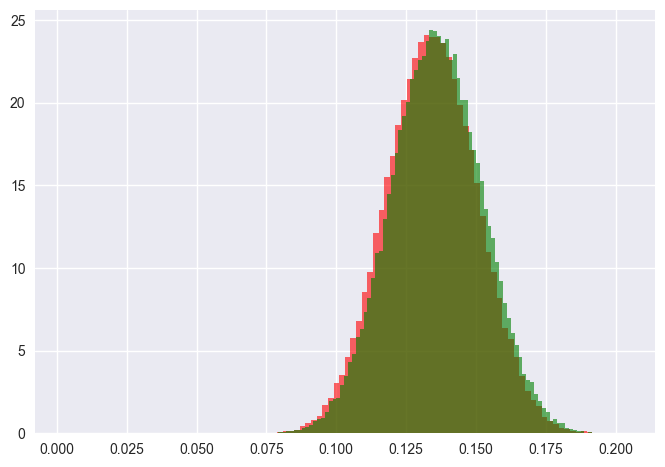

In [14]:
slabs['50'].epot.hist(bins = 100, density = True, alpha=0.6, color= 'red')
slabs['50'].eksf.hist(bins = 100, density = True, alpha=0.6, color= 'green')

<Axes: >

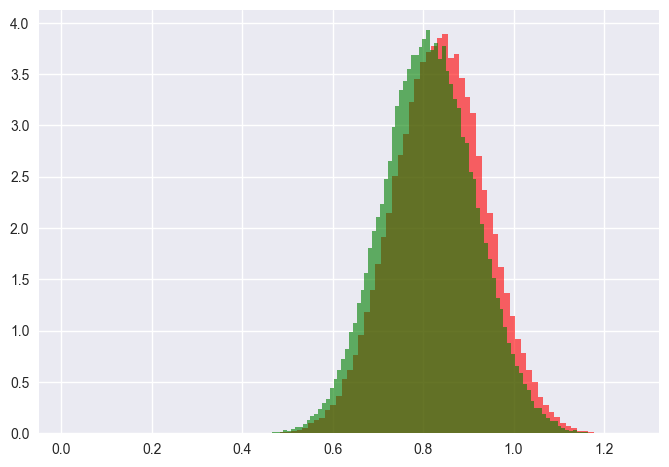

In [15]:
slabs['300'].epot.hist(bins = 100, density = True, alpha=0.6, color= 'red')
slabs['300'].eksf.hist(bins = 100, density = True, alpha=0.6, color= 'green')

<Axes: >

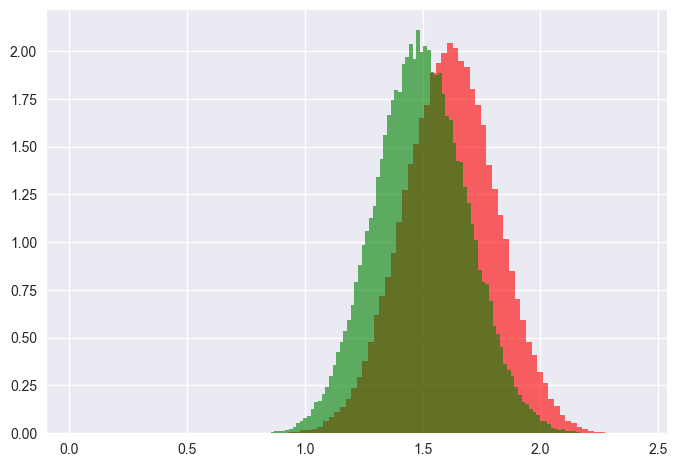

In [16]:
slabs['550'].epot.hist(bins = 100, density = 1, alpha=0.6, color= 'red')
slabs['550'].eksf.hist(bins = 100, density = 1, alpha=0.6, color= 'green')

<Axes: >

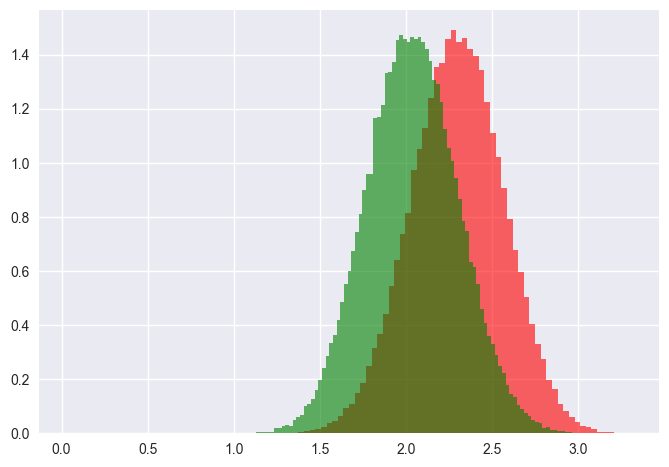

In [17]:
slabs['750'].epot.hist(bins = 100, density = True, alpha=0.6, color= 'red')
slabs['750'].eksf.hist(bins = 100, density = True, alpha=0.6, color= 'green')

In [6]:
# base = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/NN10cont/var_out/'
# NN = 'NN15_50k/slabmotions/'
# C:\Users\guill\Documents\Compu\Tesina\RESULTADOS\GSRD\slabmotion\NN10cont\var_out

file_energy='/slabmotion-t-et-ekmol-eksf-epot.dat'
file_Temp='/slabmotion-t-temp.dat'

slabs = {}
slab_Temp = {}
for T in ['50','300','550','750']:
    slabs[T] = pd.read_csv(base+T+file_energy, header=None, delim_whitespace=True)
    if slabs[T].shape[0] == 1:
        continue
    slabs[T].columns = ['t','et','ekmol','eksf','epot']
    slab_Temp[T] = pd.read_csv(base+T+file_Temp, header=None, delim_whitespace=True)
    slab_Temp[T].columns = ['t', 'Temp']
    # hist_variable(slabs[T],slab_Temp[T] ,'NN 10 T={}'.format(T))

In [7]:
slabs = pd.read_csv(path+file_energy, header=None, delim_whitespace=True)
slab.columns = ['t','et','ekmol','eksf','epot']
slab_Temp = pd.read_csv(path+file_Temp, header=None, delim_whitespace=True)
slab_Temp.columns = ['t', 'Temp']
slab

NameError: name 'path' is not defined

In [ ]:
C:\Users\guill\Documents\Compu\Tesina\RESULTADOS\GSRD\slabmotion\slabmotions15\15_50k\slabmotions

SyntaxError: unexpected character after line continuation character (3982433051.py, line 1)

In [8]:
base = 'C:/Users/guill/Documents/Compu/Tesina/RESULTADOS/GSRD/slabmotion/slabmotions15/15_50k/slabmotions/'
# C:\Users\guill\Documents\Compu\Tesina\RESULTADOS\GSRD\slabmotion\NN10cont\var_out

file_energy='/slabmotion-t-et-ekmol-eksf-epot.dat'
file_Temp='/slabmotion-t-temp.dat'

slabs2 = {}
slab_Temp2 = {}
for T in ['50','300','550','750']:
    slabs2[T] = pd.read_csv(base+T+file_energy, header=None, delim_whitespace=True)
    if slabs2[T].shape[0] == 1:
        continue
    slabs2[T].columns = ['t','et','ekmol','eksf','epot']
    slab_Temp2[T] = pd.read_csv(base+T+file_Temp, header=None, delim_whitespace=True)
    slab_Temp2[T].columns = ['t', 'Temp']

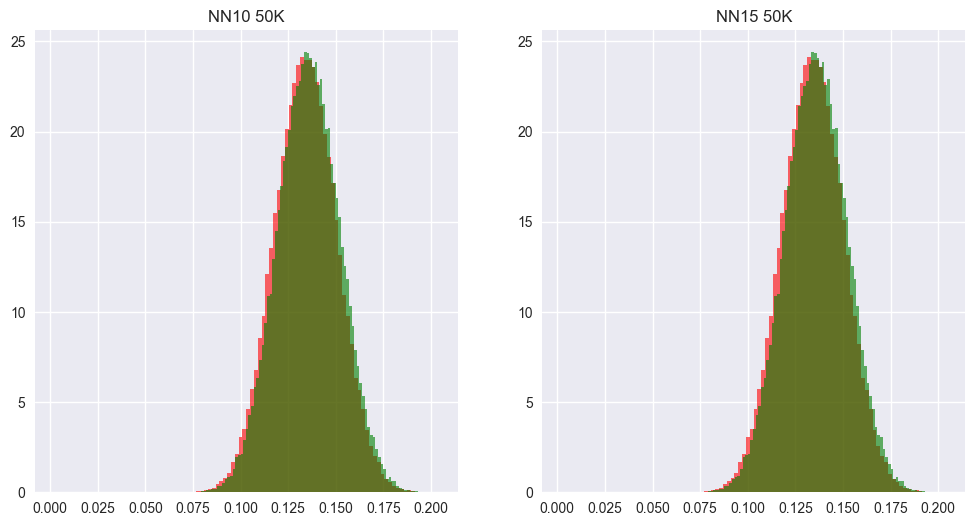

In [9]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
TEMP = '50'

slabs[TEMP].epot.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'red')
slabs[TEMP].eksf.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'green')
ax[0].set_title('NN10 {}K'.format(TEMP))
slabs2[TEMP].epot.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'red')
slabs2[TEMP].eksf.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'green')
ax[1].set_title('NN15 {}K'.format(TEMP))
plt.show()

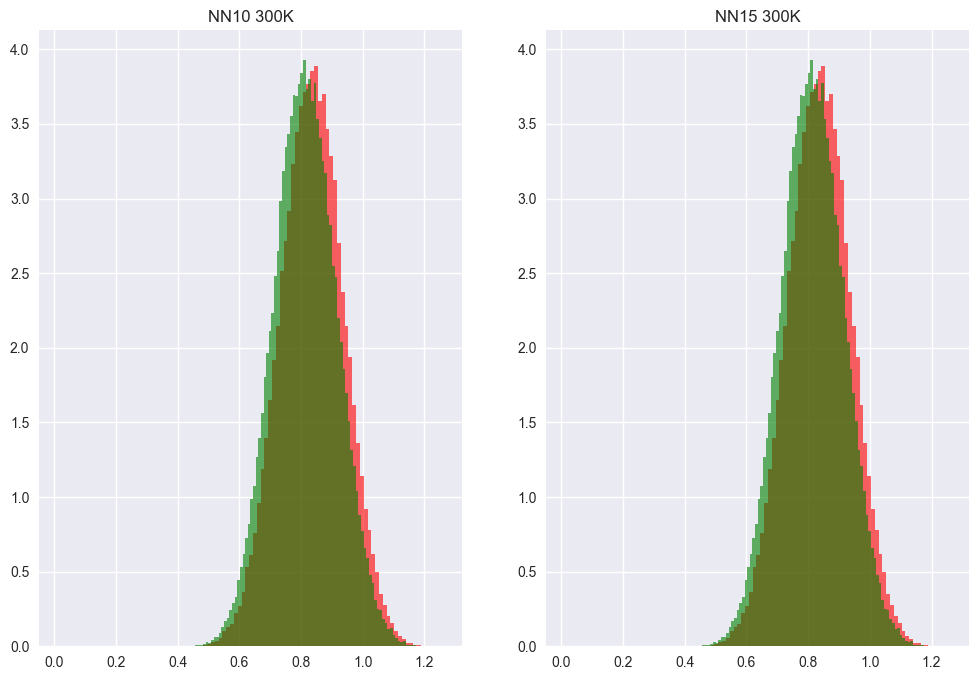

In [10]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
TEMP = '300'

slabs[TEMP].epot.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'red')
slabs[TEMP].eksf.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'green')
ax[0].set_title('NN10 {}K'.format(TEMP))
slabs2[TEMP].epot.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'red')
slabs2[TEMP].eksf.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'green')
ax[1].set_title('NN15 {}K'.format(TEMP))
plt.show()

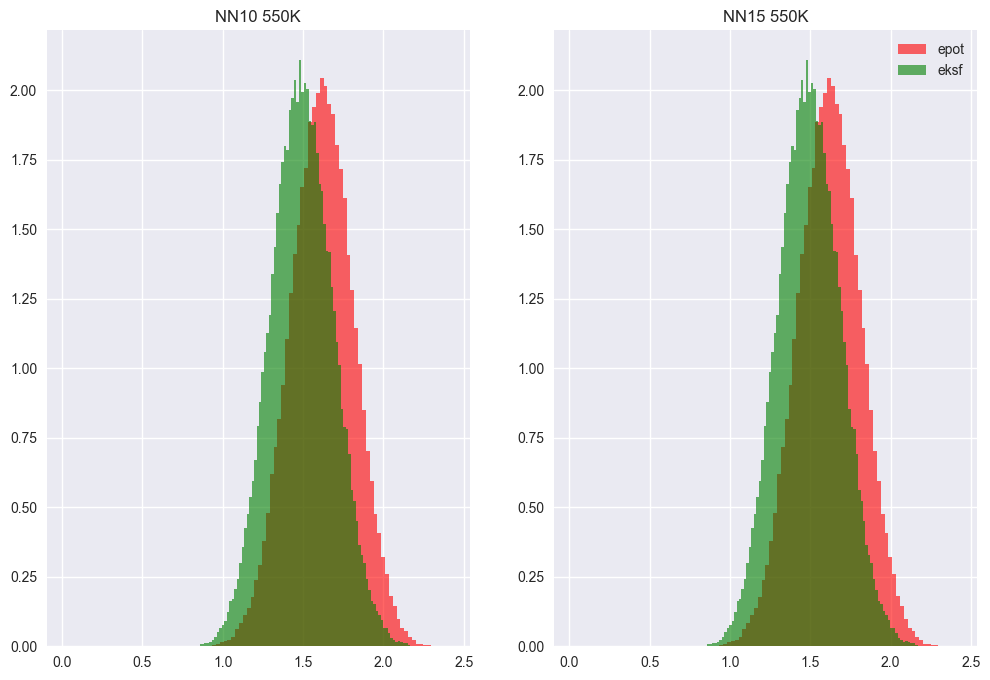

In [11]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
TEMP = '550'

slabs[TEMP].epot.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'red'  , label='epot')
slabs[TEMP].eksf.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'green', label='eksf')
ax[0].set_title('NN10 {}K'.format(TEMP))
slabs2[TEMP].epot.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'red'  , label='epot')
slabs2[TEMP].eksf.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'green' , label='eksf')
ax[1].set_title('NN15 {}K'.format(TEMP))
plt.legend()
plt.show()

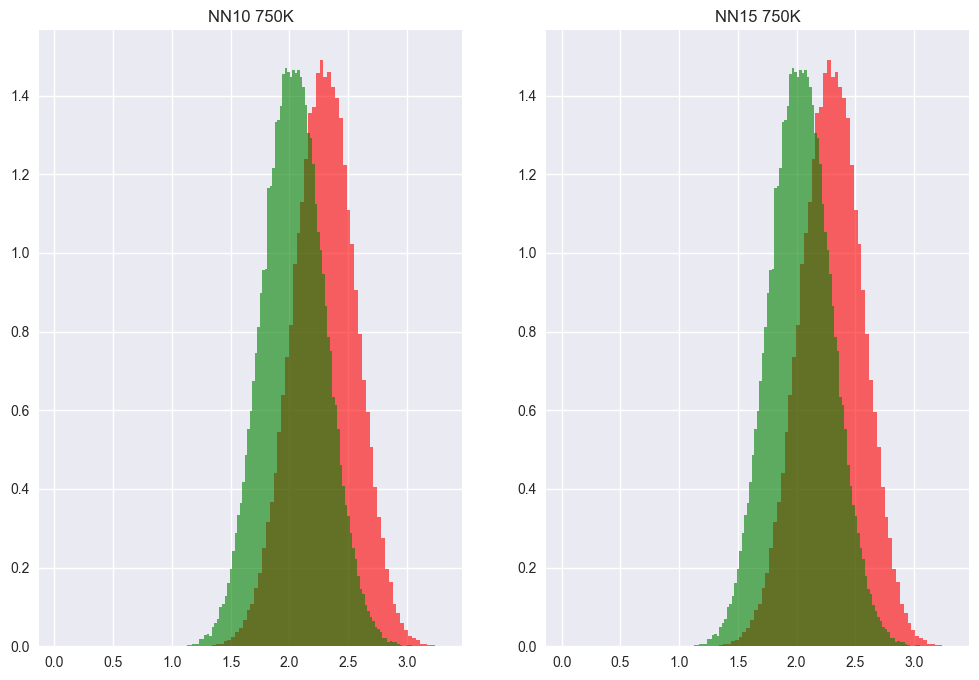

In [12]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
TEMP = '750'

slabs[TEMP].epot.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'red')
slabs[TEMP].eksf.hist(ax=ax[0],bins = 100, density = True, alpha=0.6, color= 'green')
ax[0].set_title('NN10 {}K'.format(TEMP))
slabs2[TEMP].epot.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'red')
slabs2[TEMP].eksf.hist(ax=ax[1],bins = 100, density = True, alpha=0.6, color= 'green')
ax[1].set_title('NN15 {}K'.format(TEMP))
plt.show()

<Axes: >

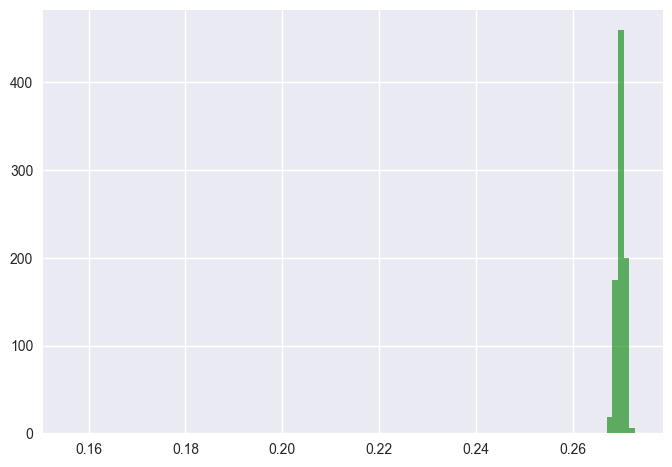

In [13]:
TEMP = '50'
slabs2[TEMP].et.hist(bins = 100, density = True, alpha=0.6, color= 'green' , label='etot')

In [14]:
TEMP = '50'
print(slabs2[TEMP].et.min(), slabs2[TEMP].et.max())

0.15638121 0.27285241


In [15]:
sns.set_style('whitegrid')

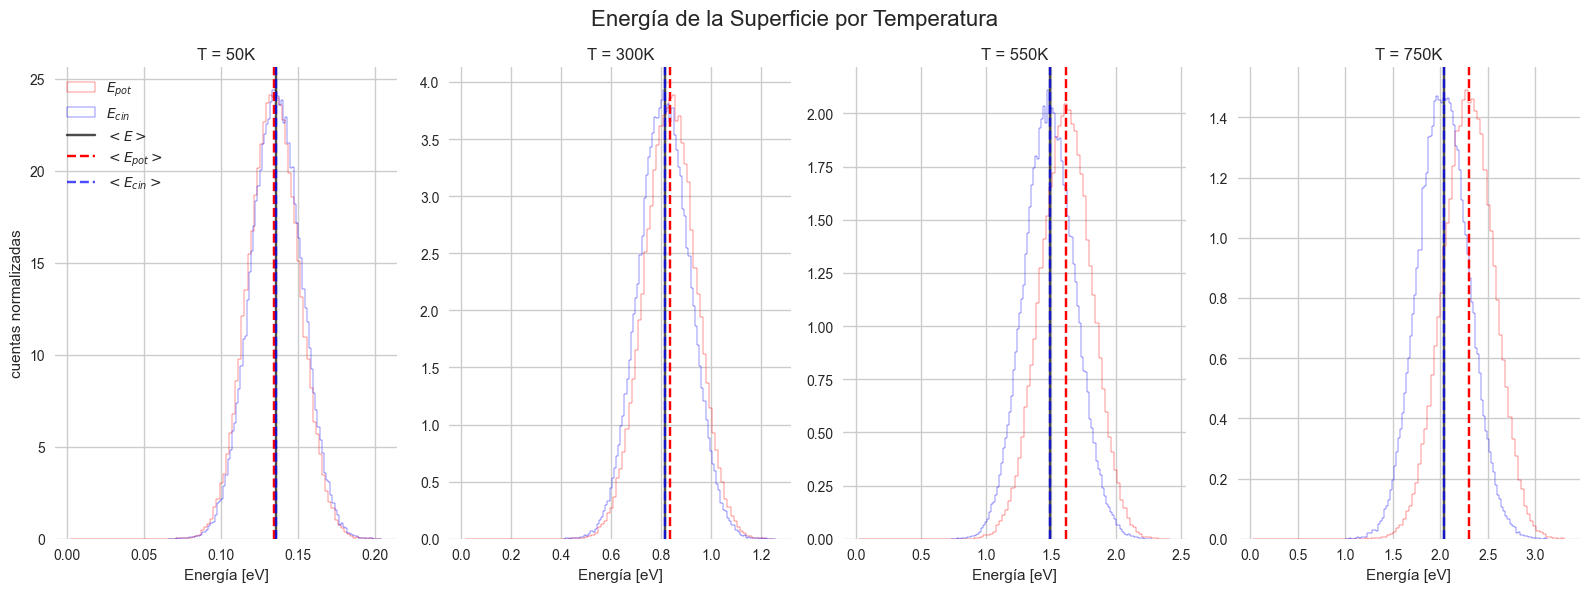

In [16]:
fig, ax = plt.subplots(1,4, figsize = (16,6))
Energias_sf = {}
for i,TEMP in enumerate(['50','300','550','750']):
    E_sf = round(Ecin(int(TEMP)),3)
    slabs[TEMP].epot.hist(ax=ax[i],bins = 100, density = 1, color= 'red' ,histtype='step' , label='$E_{pot}$')
    slabs[TEMP].eksf.hist(ax=ax[i],bins = 100, density = 1, color= 'blue', histtype='step', label='$E_{cin}$')
    ax[i].axvline(x=Ecin(int(TEMP)) , alpha=0.7, color='black', label='$<E>$')
    ax[i].axvline(x=slabs[TEMP].epot.mean(), linestyle='--', color='red',  label='$<E_{pot}>$')
    ax[i].axvline(x=slabs[TEMP].eksf.mean(), linestyle='--',alpha=0.7, color='blue', label='$<E_{cin}>$')
    ax[i].set_xlabel('Energía [eV]')
    ax[i].set_title(f'T = {TEMP}K')

    Energias_sf[TEMP] = [round(Ecin(int(TEMP)),4), round(slabs[TEMP].epot.mean(),4), round(slabs[TEMP].eksf.mean(),4)]
fig.suptitle('Energía de la Superficie por Temperatura', fontsize=16)
ax[0].set_ylabel('cuentas normalizadas')
ax[0].legend()
fig.tight_layout()
plt.show()

In [43]:
Energias_sf

{'50': [0.1357, 0.1341, 0.1358],
 '300': [0.8143, 0.836, 0.8136],
 '550': [1.493, 1.6167, 1.4931],
 '750': [2.0358, 2.2962, 2.0359]}

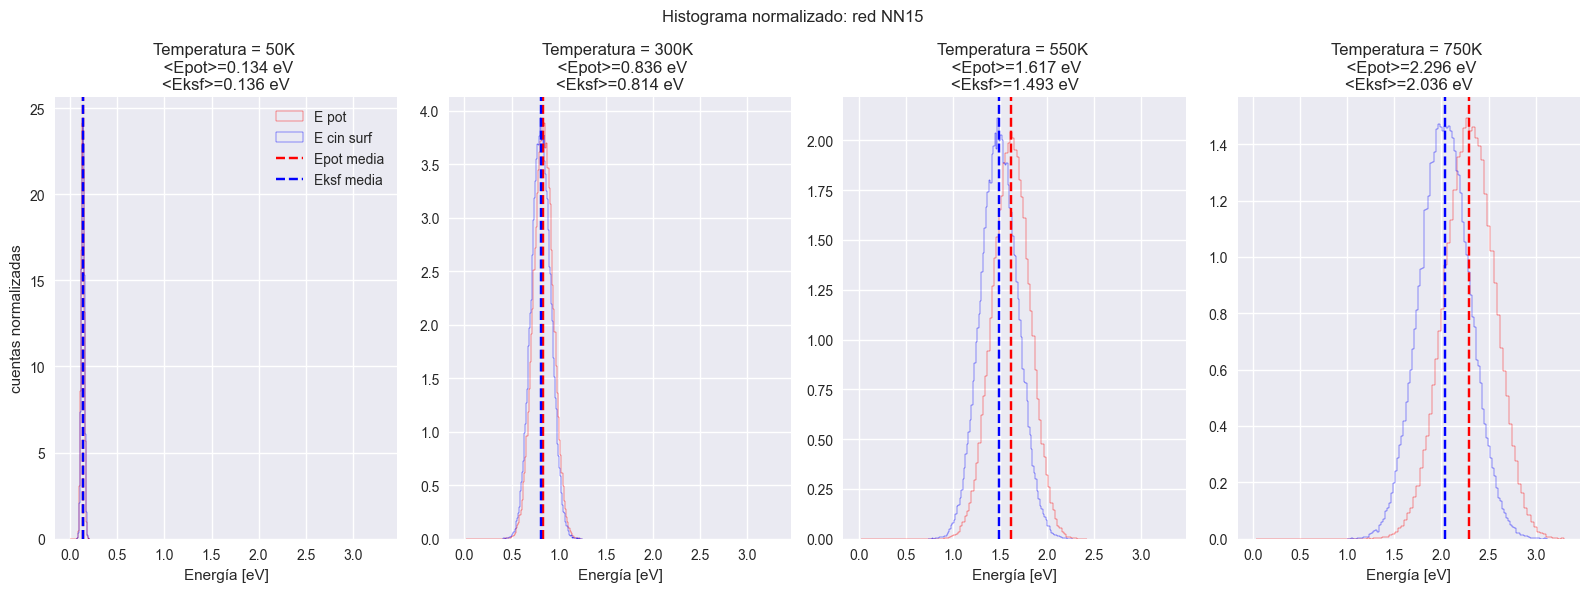

In [25]:
fig, ax = plt.subplots(1,4, figsize = (16,6), sharex=True)

for i,TEMP in enumerate(['50','300','550','750']):
    slabs[TEMP].epot.hist(ax=ax[i],bins = 100, density = 1,histtype='step',  color= 'red', label='E pot')
    slabs[TEMP].eksf.hist(ax=ax[i],bins = 100, density = 1,histtype='step',  color= 'blue', label='E cin surf')
    ax[i].axvline(x=slabs[TEMP].epot.mean(), linestyle='--', color='red', label='Epot media')
    ax[i].axvline(x=slabs[TEMP].eksf.mean(), linestyle='--', color='blue', label='Eksf media')
    ax[i].set_title(f'Temperatura = {TEMP}K \n <Epot>={round(slabs[TEMP].epot.mean(),3)} eV\n<Eksf>={round(slabs[TEMP].eksf.mean(),3)} eV' )
    ax[i].set_xlabel('Energía [eV]')
fig.suptitle('Histograma normalizado: red NN15 ')
ax[0].set_ylabel('cuentas normalizadas')
ax[0].legend()
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


E_por: 	 Para T = 50 K, $\sigma$ = 0.01628894261266436, 	 $\mu$ = 0.13408701307116933
E_por: 	 Para T = 50 K, $\sigma$ = 0.01629957742381279, 	 $\mu$ = 0.1358485417619824
E_por: 	 Para T = 300 K, $\sigma$ = 0.10238134380802562, 	 $\mu$ = 0.8359663684788153
E_por: 	 Para T = 300 K, $\sigma$ = 0.10242451899750687, 	 $\mu$ = 0.8135879840618594
E_por: 	 Para T = 550 K, $\sigma$ = 0.195957411251252, 	 $\mu$ = 1.6166597534157658
E_por: 	 Para T = 550 K, $\sigma$ = 0.19450772506448943, 	 $\mu$ = 1.4931304960160399


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


E_por: 	 Para T = 750 K, $\sigma$ = 0.26720237935249624, 	 $\mu$ = 2.2962222068615312
E_por: 	 Para T = 750 K, $\sigma$ = 0.2657963165167153, 	 $\mu$ = 2.035870958109119


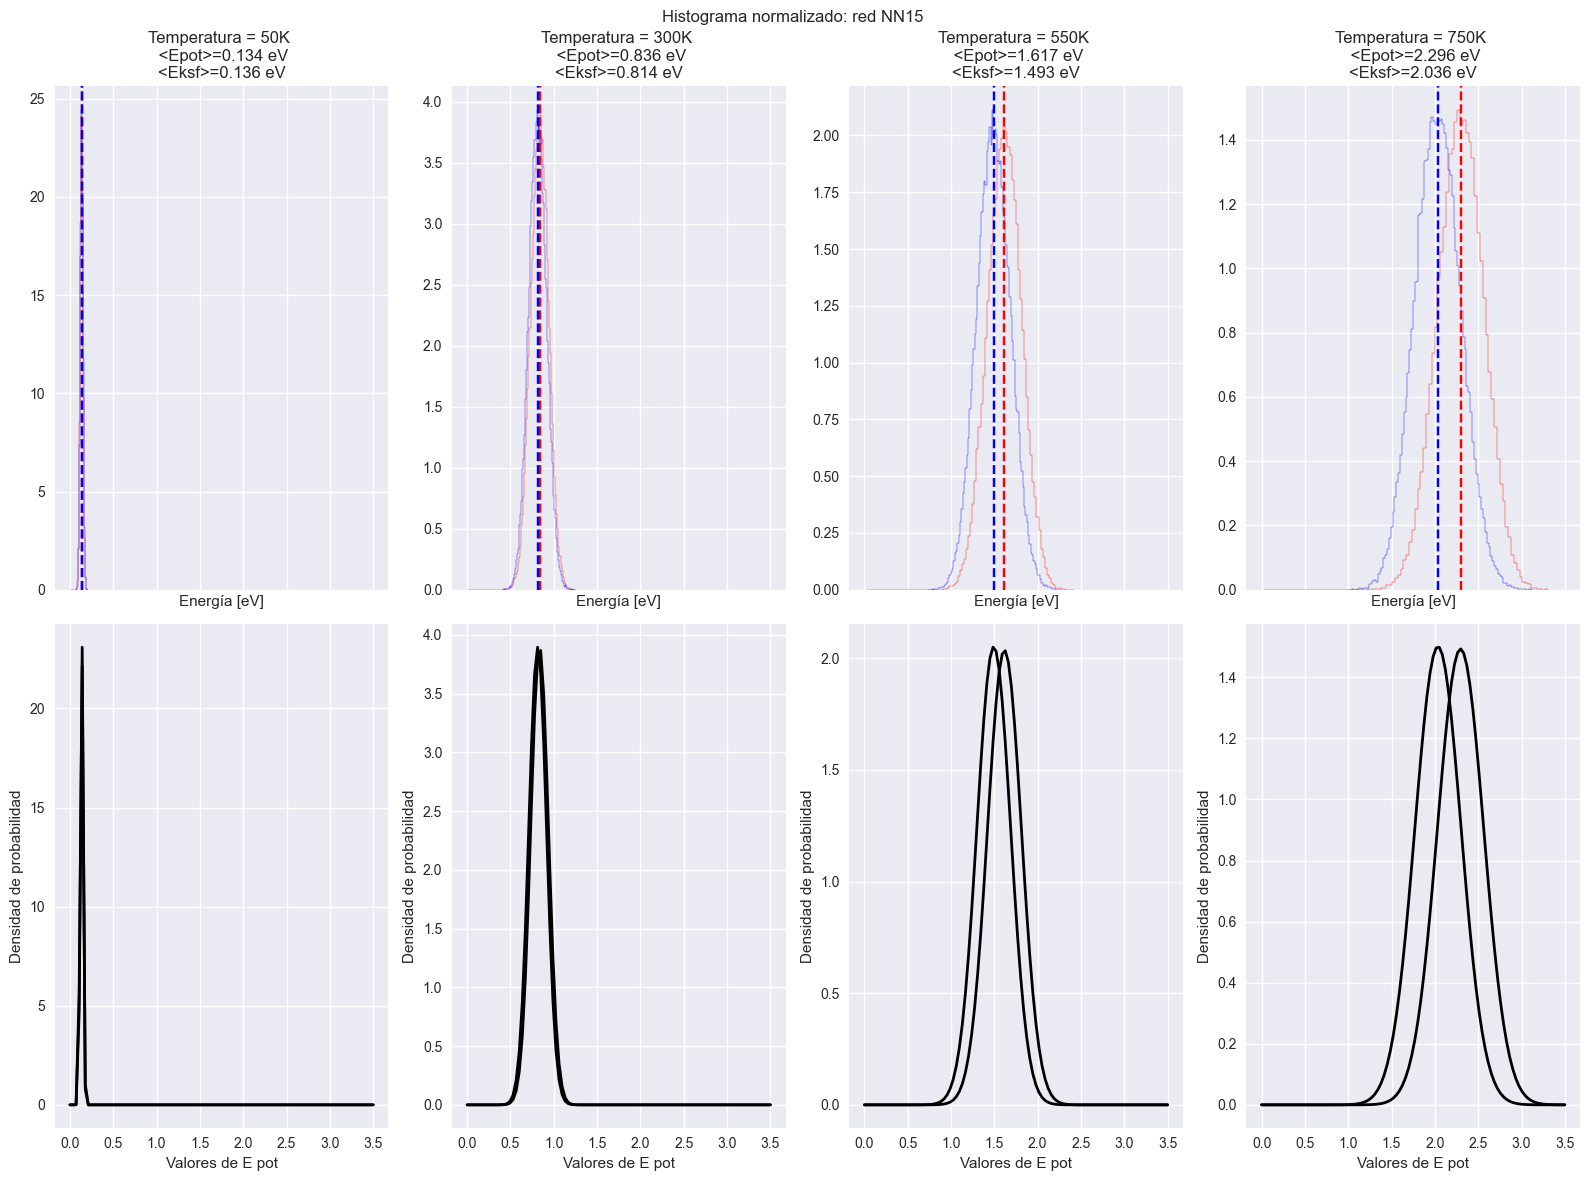

In [26]:
fig, ax = plt.subplots(2,4, figsize = (16,12), sharex=True)

for i,TEMP in enumerate(['50','300','550','750']):
    slabs[TEMP].epot.hist(ax=ax[0,i],bins = 100, density = 1,histtype='step',  color= 'red', label='E pot')
    slabs[TEMP].eksf.hist(ax=ax[0,i],bins = 100, density = 1,histtype='step',  color= 'blue', label='E cin surf')
    ax[0,i].axvline(x=slabs[TEMP].epot.mean(), linestyle='--', color='red', label='Epot media')
    ax[0,i].axvline(x=slabs[TEMP].eksf.mean(), linestyle='--', color='blue', label='Eksf media')
    ax[0,i].set_title(f'Temperatura = {TEMP}K \n <Epot>={round(slabs[TEMP].epot.mean(),3)} eV\n<Eksf>={round(slabs[TEMP].eksf.mean(),3)} eV' )
    ax[0,i].set_xlabel('Energía [eV]')

    # Ajusta una distribución gaussiana al histograma
    mu, std = norm.fit(slabs[TEMP].epot)
    # Calcula la PDF (función de densidad de probabilidad) para la distribución gaussiana ajustada
    x = np.linspace(0, 3.5, 100)
    p = norm.pdf(x, mu, std)
    # Grafica la PDF ajustada
    ax[1,i].plot(x, p, 'k', linewidth=2)
    print(f'E_por: \t Para T = {TEMP} K, $\sigma$ = {std}, \t $\mu$ = {mu}')

  # Ajusta una distribución gaussiana al histograma
    mu, std = norm.fit(slabs[TEMP].eksf)
    # Calcula la PDF (función de densidad de probabilidad) para la distribución gaussiana ajustada
    p = norm.pdf(x, mu, std)
    # Grafica la PDF ajustada
    ax[1,i].plot(x, p, 'k', linewidth=2)
    print(f'E_por: \t Para T = {TEMP} K, $\sigma$ = {std}, \t $\mu$ = {mu}')

    # Añade etiquetas y leyenda si es necesario
    ax[1,i].set_xlabel('Valores de E pot')
    ax[1,i].set_ylabel('Densidad de probabilidad')
    ax[1,i].legend()


fig.suptitle('Histograma normalizado: red NN15 ')
# ax[0].set_ylabel('cuentas normalizadas')
# ax[0].legend()
fig.tight_layout()
plt.show()

In [74]:
with open('sigma(T).csv','w') as f:
    f.write(f'T,mu_ksf,mu_pot,std_ksf,std_pot,\t')
    for i,TEMP in enumerate(['50','300','550','750']):
        # Ajusta una distribución gaussiana al histograma
        mu_ksf, std_ksf = norm.fit(slabs[TEMP].epot)
        # Ajusta una distribución gaussiana al histograma
        mu_pot, std_pot = norm.fit(slabs[TEMP].eksf)
        
        f.write(f'{TEMP},{mu_ksf},{mu_pot},{std_ksf},{std_pot},\t')
        print(f'E_por: \t Para T = {TEMP} K, $\sigma$ = {std}, \t $\mu$ = {mu}')


E_por: 	 Para T = 50 K, $\sigma$ = 0.2657963165167153, 	 $\mu$ = 2.035870958109119
E_por: 	 Para T = 300 K, $\sigma$ = 0.2657963165167153, 	 $\mu$ = 2.035870958109119
E_por: 	 Para T = 550 K, $\sigma$ = 0.2657963165167153, 	 $\mu$ = 2.035870958109119
E_por: 	 Para T = 750 K, $\sigma$ = 0.2657963165167153, 	 $\mu$ = 2.035870958109119


In [44]:
import csv

# Assuming slabs is your DataFrame and norm is imported as in the previous example

with open('sigma(T).csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    # Write header
    writer.writerow(['T', 'mu_ksf', 'mu_pot', 'std_ksf', 'std_pot'])
    
    for TEMP in ['50', '300', '550', '750']:
        # Ajusta una distribución gaussiana al histograma para ksf
        mu_ksf, std_ksf = norm.fit(slabs[TEMP].eksf)
        
        # Ajusta una distribución gaussiana al histograma para pot
        mu_pot, std_pot = norm.fit(slabs[TEMP].epot)
        
        # Write the values to the CSV file
        writer.writerow([TEMP, mu_ksf, mu_pot, std_ksf, std_pot])
        
        print(f'E_pot: Para T = {TEMP} K, sigma = {std_ksf}, mu = {mu_ksf}')
        print(f'E_ksf: Para T = {TEMP} K, sigma = {std_pot}, mu = {mu_pot}')


E_pot: Para T = 50 K, sigma = 0.01629957742381279, mu = 0.1358485417619824
E_ksf: Para T = 50 K, sigma = 0.01628894261266436, mu = 0.13408701307116933
E_pot: Para T = 300 K, sigma = 0.10242451899750687, mu = 0.8135879840618594
E_ksf: Para T = 300 K, sigma = 0.10238134380802562, mu = 0.8359663684788153
E_pot: Para T = 550 K, sigma = 0.19450772506448943, mu = 1.4931304960160399
E_ksf: Para T = 550 K, sigma = 0.195957411251252, mu = 1.6166597534157658
E_pot: Para T = 750 K, sigma = 0.2657963165167153, mu = 2.035870958109119
E_ksf: Para T = 750 K, sigma = 0.26720237935249624, mu = 2.2962222068615312


In [45]:
sigmas = pd.read_csv('sigma(T).csv')
sigmas['d_std'] = sigmas['std_ksf'] - sigmas['std_pot'] 
sigmas['d_mu'] = sigmas['mu_ksf'] - sigmas['mu_pot'] 

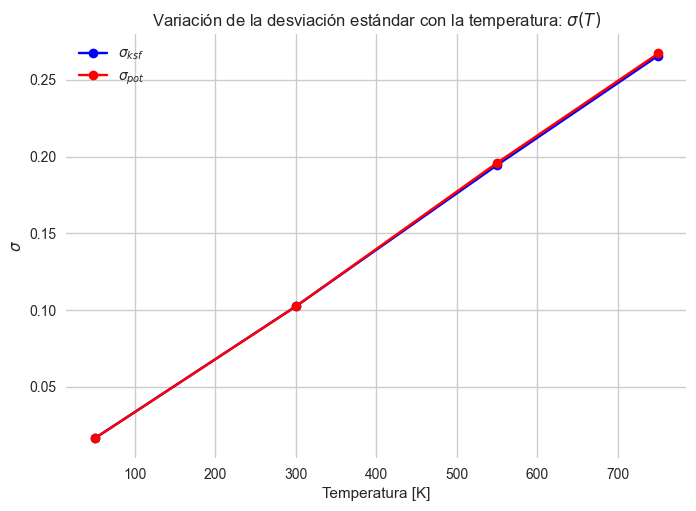

In [46]:
ax = plt.subplot(111)

sigmas.plot(x='T', y='std_ksf', color='blue', marker='o',ax=ax, label= '$\sigma_{ksf}$')
sigmas.plot(x='T', y='std_pot', color='red' , marker='o',ax=ax, label= '$\sigma_{pot}$')
ax.set_xlabel('Temperatura [K]')
ax.set_ylabel(f'$\sigma$')
plt.title(f'Variación de la desviación estándar con la temperatura: $\sigma (T)$')
plt.show()

In [52]:
T = [50,300,550,750]
Es = [Ecin(Ts) for Ts in T]

In [61]:
sigmas['Esf'] = Es

In [62]:
sigmas

,T,mu_ksf,mu_pot,std_ksf,std_pot,d_std,d_mu,Esf
0,50,0.135849,0.134087,0.016300,0.016289,0.000011,0.001762,0.135723
1,300,0.813588,0.835966,0.102425,0.102381,0.000043,-0.022378,0.814338
2,550,1.493130,1.616660,0.194508,0.195957,-0.001450,-0.123529,1.492953
3,750,2.035871,2.296222,0.265796,0.267202,-0.001406,-0.260351,2.035845


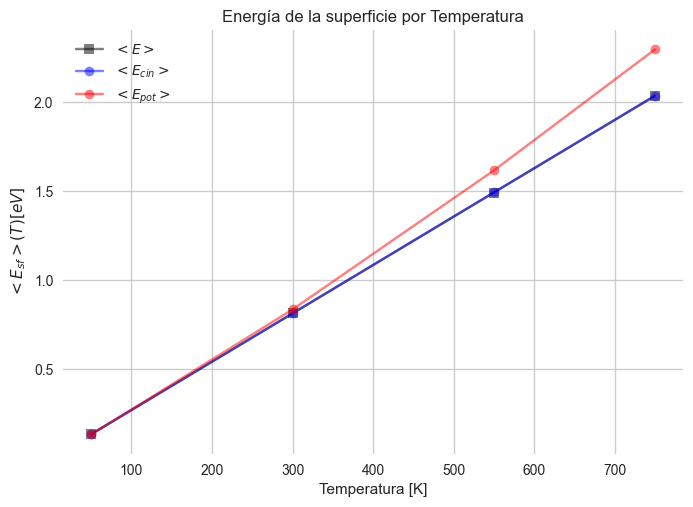

In [65]:
ax = plt.subplot(111)

sigmas.plot(x='T', y='Esf',alpha = 0.5, color='black' , marker='s',ax=ax, label= '$<E>$')
sigmas.plot(x='T', y='mu_ksf',alpha = 0.5, color='blue', marker='o',ax=ax, label= '$<E_{cin}>$')
sigmas.plot(x='T', y='mu_pot',alpha = 0.5, color='red' , marker='o',ax=ax, label= '$<E_{pot}>$')
ax.set_xlabel('Temperatura [K]')
ax.set_ylabel('$<E_{sf}>(T)[eV]$')
plt.title('Energía de la superficie por Temperatura')
plt.show()

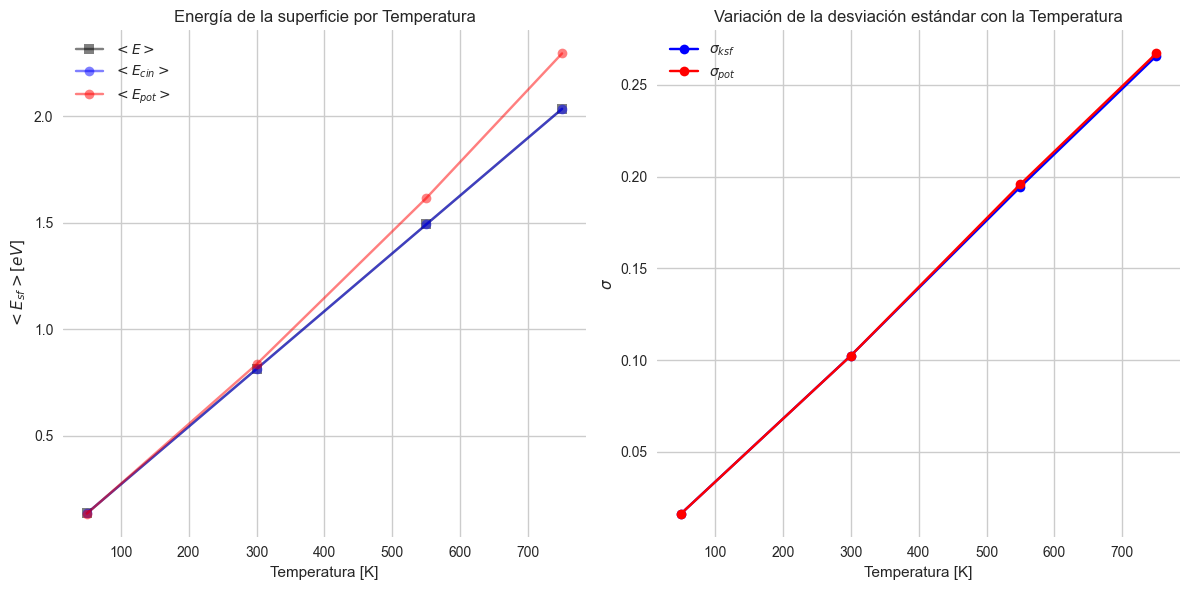

In [76]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sigmas.plot(x='T', y='Esf',alpha = 0.5, color='black' , marker='s', ax=ax[0], label= '$<E>$')
sigmas.plot(x='T', y='mu_ksf',alpha = 0.5, color='blue', marker='o',ax=ax[0], label= '$<E_{cin}>$')
sigmas.plot(x='T', y='mu_pot',alpha = 0.5, color='red' , marker='o',ax=ax[0], label= '$<E_{pot}>$')
ax[0].set_xlabel('Temperatura [K]')
ax[0].set_ylabel('$<E_{sf}> [eV]$')
ax[0].set_title('Energía de la superficie por Temperatura')

sigmas.plot(x='T', y='std_ksf', color='blue', marker='o',ax=ax[1], label= '$\sigma_{ksf}$')
sigmas.plot(x='T', y='std_pot', color='red' , marker='o',ax=ax[1], label= '$\sigma_{pot}$')
ax[1].set_xlabel('Temperatura [K]')
ax[1].set_ylabel(f'$\sigma$')
ax[1].set_title(f'Variación de la desviación estándar con la Temperatura')
fig.tight_layout()
plt.show()